In [20]:
import pandas as pd
import numpy as np
import time
import urllib.request 
import xarray as xr 
import netCDF4 as nc
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point, Polygon
import geopandas as gpd

np.warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('PMNM_bounds.csv')

In [3]:
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
poly = Polygon([(p.x, p.y)  for p in  geometry])

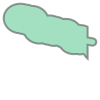

In [4]:
poly

In [5]:
xcoord1 = (np.min(df.lon), np.max(df.lon))
ycoord1 = (np.min(df.lat), np.max(df.lat))

In [6]:
tcoord = ("2019-01-15", "2019-12-15")

In [7]:
url='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v1_0_monthly.nc?analysed_sst[('+ tcoord[0] +'):1:('+ tcoord[1] +')][('+ str(ycoord1[0]) +'):1:('+ str(ycoord1[1]) +')][(' + str(xcoord1[0]) +'):1:('+ str(xcoord1[1]) +')]'

In [8]:
url

'https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v1_0_monthly.nc?analysed_sst[(2019-01-15):1:(2019-12-15)][(19.2345832):1:(31.79786423)][(177.84422):1:(198.9827)]'

In [9]:
urllib.request.urlretrieve(url, "sst.nc")
ds = xr.open_dataset('sst.nc',decode_cf=False)

In [10]:
ds.analysed_sst.shape

(12, 252, 424)

In [14]:
start_time=time.time()
mask=np.empty((len(ds.latitude.values),len(ds.longitude.values)))
mask[:]=np.NaN

for i in range(len(ds.latitude.values)):
    for j in range(len(ds.longitude.values)):
        p=Point(ds.longitude.values[j],ds.latitude.values[i],)     
        if int(p.within(poly))==1:
            mask[i,j]=int(p.within(poly))
            
end_time=time.time()
print("total time = %g mins" % ((end_time-start_time)/60.))

total time = 0.580524 mins


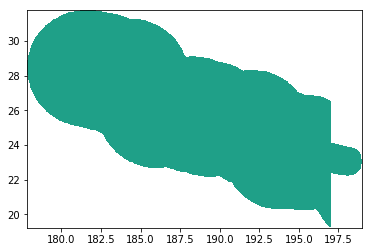

In [15]:
plt.contourf(ds.longitude,ds.latitude,mask)

In [16]:
SST=ds.analysed_sst*mask

In [17]:
np.min(SST),np.max(SST)

(<xarray.DataArray 'analysed_sst' ()>
 array(16.863333), <xarray.DataArray 'analysed_sst' ()>
 array(28.78))

In [18]:
levs = np.arange(16, 29, 0.05)
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"] 
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))

In [21]:
# GeoJSON file downloaded from :
# https://eric.clst.org/tech/usgeojson/
country = gpd.read_file("gz_2010_us_outline_20m.json")
country.head()

,TYPE,R_STATEFP,L_STATEFP,geometry
0,MEXICAN,48,,"LINESTRING (-97.14557 25.97113, -97.17263 25.9..."
1,MEXICAN,35,,"LINESTRING (-106.52854 31.78391, -106.75055 31..."
2,COASTAL,55,,"LINESTRING (-86.89989 45.29518, -86.90490 45.2..."
3,COASTAL,55,,"LINESTRING (-90.46408 46.99464, -90.46546 47.0..."
4,COASTAL,55,,"LINESTRING (-87.59021 45.09526, -87.58715 45.0..."


Text(0.5,1,'SST - April 2019')

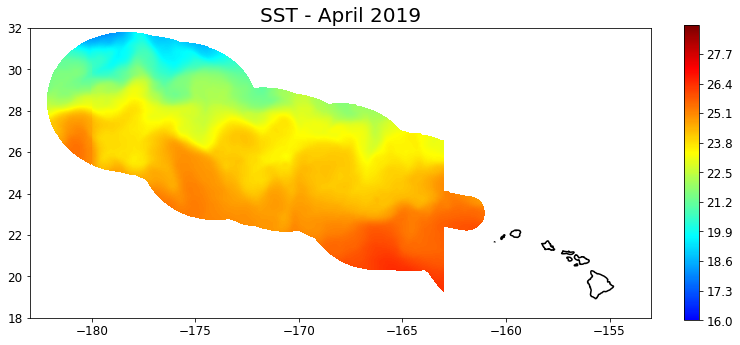

In [22]:
country.plot(figsize=(12,8),color='black')
plt.xlim(-183,-153)
plt.ylim(18,32)
cs=plt.contourf(ds.longitude-360,ds.latitude,SST[4,:,:],levs,cmap=cm)
cbar=plt.colorbar(fraction=0.022)
cbar.ax.tick_params(labelsize=12) 
cs.ax.tick_params(labelsize=12)
plt.title('SST - April 2019', fontsize=20)

## Example of loading and working which an ESRI shapefile instead of .csv file

In [10]:
from shapely.geometry import Point, Polygon

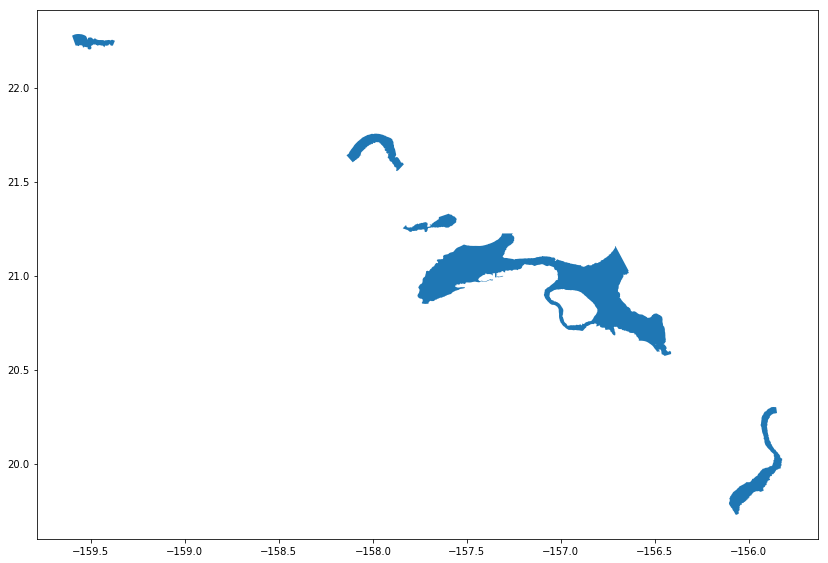

In [25]:
import geopandas as gpd
import descartes
from matplotlib import pyplot as plt 
fp='C:\VM_Shared_Directory\OceanWatch\indicators\Monument\pmnm_Expanded_py_Albers\PMNM_py_files\hihwnms_py.shp'
data = gpd.read_file(fp)

data.plot(figsize=(14, 10))
plt.show()

In [30]:
data

,SANCTUARY,DATUM,AREA_NAME,POLY_ID,AREA_KM,AREA_NM,AREA_SM,AREA_ACRES,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,HIHWNMS,NAD 83,LANAI,1,2696.5116,786.3028,1041.1248,666344.3337,6.165034,6.165076,0.234101,"POLYGON ((-157.76263 20.89360, -157.76181 20.8..."
1,HIHWNMS,NAD 83,KAUAI,2,104.3560,30.4302,40.2919,25787.7679,0.660569,0.660569,0.009149,"POLYGON ((-159.51848 22.25571, -159.51796 22.2..."
2,HIHWNMS,NAD 83,NORTH OAHU,3,230.6446,67.2560,89.0520,56995.3982,1.066711,1.066711,0.020138,"POLYGON ((-157.97863 21.75441, -157.97553 21.7..."
3,HIHWNMS,NAD 83,SOUTH OAHU,4,120.5667,35.1572,46.5509,29793.6539,0.817195,0.817212,0.010496,"POLYGON ((-157.84098 21.25158, -157.82380 21.2..."
4,HIHWNMS,NAD 83,BIG ISLAND,5,386.2967,112.6441,149.1494,95459.1181,1.763711,1.763707,0.033281,"POLYGON ((-156.10583 19.78632, -156.10583 19.7..."


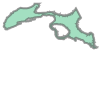

In [31]:
data.geometry[0]

In [32]:
p1=Point(-122.25,36.5)  #27.425 190.025
int(p1.within(data.geometry[0]))

0